<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

<!--NAVIGATION-->
< [Obtaining Data from MAST](01.00-Obtaining-Data-From-Mast.ipynb) | [Contents](http://nbviewer.jupyter.org/github/christinahedges/k2torials/tree/master/notebooks/index.ipynb) | [Investigating Light Curve Files](01.02-Investigating-LC-Files.ipynb) >

# Investigating Target Pixel Files

From MAST we have obtained a target pixel file. Using *astropy* or *fitsio* we can take a look at what is inside the file. (To install astropy or fitsio you can use a package manager such as *anaconda* or *pip*. Take a look at the instructions to install *astropy* [here](http://docs.astropy.org/en/stable/install.html))

In [1]:
from astropy.io import fits
h = fits.open('data/kplr006922244-2010078095331_lpd-targ.fits.gz')

We've opened the fits file and labeled all the contents as 'h'. The file is broken down into three 'extentions'. The first of which is the information about the source. This is stored in the header of the first extention, let's take a look:

In [2]:
h[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-23'         / file creation date.                            
CREATOR = '917482 TargetPixelExporterPipelineModule' / pipeline job and program 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.25 r60410' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

Some parts of this information we already know. For example we know that that 'KEPLERID' is 6922244. Some of this informaiton is based on the Kepler Input Catalog (KIC), such as the temperature, radius and colour of the star. Most of the other information is about the telescope itself, such as the module number, and where it was pointing, such as the RA and Dec of the source.

The actual images the telescope took are in the second extention. Let's take a look at that now. Rather than print all the data, we can just find the column names. These are all explained in more detail in the second extention header (which you can access by typing 'h[1].header').

In [11]:
h[1].data.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'RAW_CNTS',
 'FLUX',
 'FLUX_ERR',
 'FLUX_BKG',
 'FLUX_BKG_ERR',
 'COSMIC_RAYS',
 'QUALITY',
 'POS_CORR1',
 'POS_CORR2',
 'RB_LEVEL']

It is the TIME, FLUX and FLUX_ERR columns that we are most interested in. In order to view this data let's first take a look at the shape of it.

In [13]:
import numpy as np
np.shape(h[1].data['FLUX'])

(4397, 5, 5)

The FLUX data is a 4397x5x5 array. The first axis is the 'time' axis, and the images themselves are 5 pixels by 5 pixels. Let's take a look at the first image.

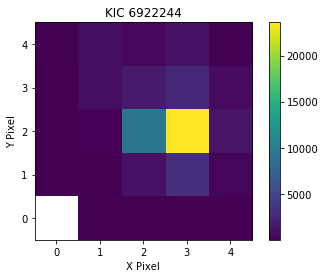

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(h[1].data['FLUX'][0],origin='bottom')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.colorbar()
plt.title('KIC 6922244')

There are one of these images for every Kepler cadence. Each of the pixels are 4 arcseconds ($4"$) across. The point spread function (PSF) of the source makes the light from the star fall into several different pixels. This can be seen in the image above. Because of this we have to sum up many pixels in order to collect all the light from the source. To do this we can sum up all the pixels in an 'aperture'. An aperture is a mask where we take only some pixels which are roughly only related to the star in question. 

The recommended aperture for the target is given in second extention of the TPF. Here values of 0 (purple) are not collected in the TPF, values of 1 (blue) are collected but not used to create the Light Curves available on mast. Values of 3 (red) are used for aperture photometry.

[[0 1 1 1 1]
 [1 1 3 3 1]
 [1 1 3 3 1]
 [1 3 3 3 1]
 [1 1 1 3 1]]


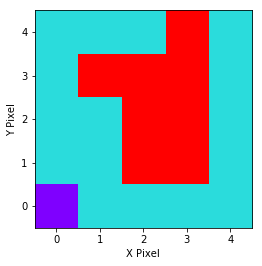

In [30]:
plt.imshow(h[2].data,cmap=plt.get_cmap('rainbow'),origin='bottom')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
print(h[2].data)

<!--NAVIGATION-->
< [Obtaining Data from MAST](01.00-Obtaining-Data-From-Mast.ipynb) | [Contents](http://nbviewer.jupyter.org/github/christinahedges/k2torials/tree/master/notebooks/index.ipynb) | [Investigating Light Curve Files](01.02-Investigating-LC-Files.ipynb) >